**Disclaimer:** Most of the content in this notebook is coming from [www.scipy-lectures.org](http://www.scipy-lectures.org/intro/index.html)

# Scipy - High-level Scientific Computing

The [scipy](https://www.scipy.org/) package contains various toolboxes dedicated to common issues in scientific computing. Its different submodules correspond to different applications, such as interpolation, integration, optimization, image processing, statistics, special functions, etc.

`scipy` is composed of task-specific sub-modules:

    scipy.cluster          Clustering package
    scipy.constants        Constants
    scipy.fftpack          Discrete Fourier transforms
    scipy.integrate        Integration and ODEs
    scipy.interpolate      Interpolation
    scipy.io               Input and output
    scipy.linalg           Linear algebra
    scipy.misc             Miscellaneous routines
    scipy.ndimage          Multi-dimensional image processing
    scipy.odr              Orthogonal distance regression
    scipy.optimize         Optimization and root finding
    scipy.signal           Signal processing
    scipy.sparse           Sparse matrices
    scipy.sparse.linalg    Sparse linear algebra
    scipy.sparse.csgraph   Compressed Sparse Graph Routines
    scipy.spatial          Spatial algorithms and data structures
    scipy.special          Special functions
    scipy.stats            Statistical functions
    scipy.stats.mstats     Statistical functions for masked arrays

They all depend on `numpy`, but are mostly independent of each
other. The standard way of importing Numpy and these Scipy modules
is:

In [1]:
import numpy as np
from scipy import stats  # same for other sub-modules

**Warning:** This tutorial is far from a complete introduction to numerical computing. As enumerating the different submodules and functions in scipy would be very boring, we concentrate instead on a few examples to give a general idea of how to use ``scipy`` for scientific computing.

## File input/output: `scipy.io`

### Load and Save `MATLAB` files

In [2]:
from scipy import io as spio
a = np.ones((3, 3))
spio.savemat('file.mat', {'a': a}) # savemat expects a dictionary

In [3]:
ls *mat

file.mat


In [4]:
data = spio.loadmat('file.mat')
data['a']

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

### See also

* Load text files: `numpy.loadtxt`/`numpy.savetxt`
* Clever loading of text/csv files: `numpy.genfromtxt`/`numpy.recfromcsv`
* Fast and efficient, but numpy-specific, binary format: `numpy.save`/`numpy.load`
* More advanced input/output of images in scikit-image: `skimage.io`

## Linear algebra operations: `scipy.linalg`

The `scipy.linalg` module provides standard linear algebra operations.

The `scipy.linalg.det` function computes the determinant of a square matrix:

In [5]:
from scipy import linalg
arr = np.array([[1, 2],
                [3, 4]])
linalg.det(arr)

-2.0

The `scipy.linalg.inv` function computes the inverse of a square matrix:

In [6]:
arr = np.array([[1, 2],
                [3, 4]])
iarr = linalg.inv(arr)
iarr

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

More advanced operations are available, for example **singular-value decomposition (SVD)**:

In [7]:
arr = np.arange(9).reshape((3, 3)) + np.diag([1, 0, 1])
arr

array([[1, 1, 2],
       [3, 4, 5],
       [6, 7, 9]])

In [8]:
uarr, spec, vharr = linalg.svd(arr)

# The resulting array spectrum is
spec

array([14.88982544,  0.45294236,  0.29654967])

The original matrix can be re-composed by matrix multiplication of the outputs of ``svd`` with ``np.dot``:

In [9]:
sarr = np.diag(spec)
svd_mat = uarr.dot(sarr).dot(vharr)
svd_mat

array([[1., 1., 2.],
       [3., 4., 5.],
       [6., 7., 9.]])

SVD is commonly used in statistics and signal processing. Many other standard decompositions (QR, LU, Cholesky, Schur), as well as solvers for linear systems, are available in `scipy.linalg`.

## Interpolation: `scipy.interpolate`

`scipy.interpolate` is useful for fitting a function from experimental data and thus evaluating points where no measure exists.

In [10]:
# Let's create some data
measured_time = np.linspace(0, 1, 10)
noise = (np.random.random(10)*2 - 1) * 1e-1
measures = np.sin(2 * np.pi * measured_time) + noise

`scipy.interpolate.interp1d` can build a linear interpolation
function:

In [11]:
from scipy.interpolate import interp1d
linear_interp = interp1d(measured_time, measures)
interpolation_time = np.linspace(0, 1, 50)
linear_results = linear_interp(interpolation_time)

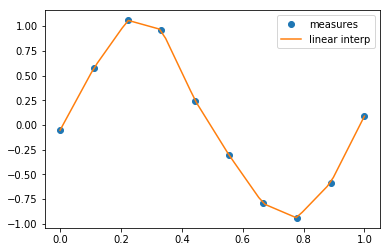

In [12]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(measured_time, measures, 'o', ms=6, label='measures')
plt.plot(interpolation_time, linear_results, label='linear interp')
plt.legend();

A cubic interpolation can also be selected by providing the ``kind`` optional keyword argument:

In [13]:
cubic_interp = interp1d(measured_time, measures, kind='cubic')
cubic_results = cubic_interp(interpolation_time)

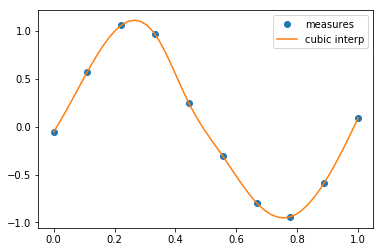

In [14]:
plt.plot(measured_time, measures, 'o', ms=6, label='measures')
plt.plot(interpolation_time, cubic_results, label='cubic interp')
plt.legend()

## Optimization and fit: `scipy.optimize`

Optimization is the problem of finding a numerical solution to a minimization or equality.

The `scipy.optimize` module provides algorithms for function minimization (scalar or multi-dimensional), curve fitting and root finding.

In [15]:
from scipy import optimize

### Curve fitting

Suppose we have data on a sine wave, with some noise:

In [16]:
x_data = np.linspace(-5, 5, num=50)
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50)

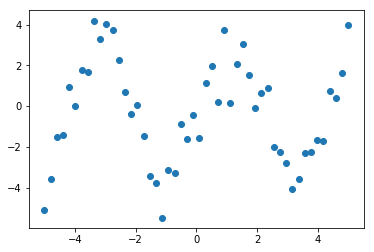

In [17]:
# And plot it
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data)
plt.show()

If we know that the data lies on a sine wave, but not the amplitudes or the period, we can find those by least squares curve fitting. First, we have to define the test function to fit, here a sine with unknown amplitude and period:

In [18]:
def test_func(x, a, b):
    return a * np.sin(b * x)

We then use `scipy.optimize.curve_fit` to find $a$ and $b$:

In [19]:
params, params_covariance = optimize.curve_fit(
    test_func, x_data, y_data, p0=[2, 2])
print(params)

[3.28132769 1.47935323]


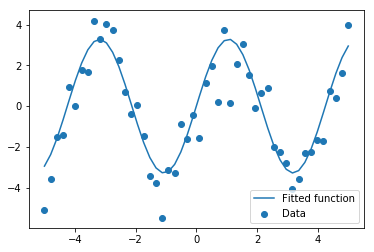

In [20]:
# And plot the resulting curve on the data
plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, test_func(x_data, params[0], params[1]),
         label='Fitted function')
plt.legend(loc='best')
plt.show()

### Finding the minimum of a scalar function

Let's define the following function:

In [21]:
def f(x):
    return x**2 + 10*np.sin(x)

and plot it:

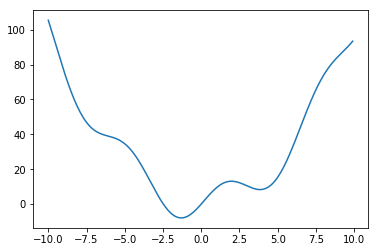

In [22]:
x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x))
plt.show()

This function has a global minimum around -1.3 and a local minimum around 3.8.

Searching for minimum can be done with `scipy.optimize.minimize`, given a starting point `x0`, it returns the location of the minimum that it has found:

In [23]:
result = optimize.minimize(f, x0=0) 
result

      fun: -7.945823375615215
 hess_inv: array([[0.08589237]])
      jac: array([-1.1920929e-06])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([-1.30644012])

In [24]:
result.x # The coordinate of the minimum

array([-1.30644012])

## Fast Fourier transforms: `scipy.fftpack`

The `scipy.fftpack` module computes fast Fourier transforms (FFTs)
and offers utilities to handle them. The main functions are:

* `scipy.fftpack.fft` to compute the FFT
* `scipy.fftpack.fftfreq` to generate the sampling frequencies
* `scipy.fftpack.ifft` computes the inverse FFT, from frequency space to signal space

As an illustration, let's create a (noisy) input signal (``sig``), and its FFT:

In [25]:
from scipy import fftpack

time_step = 0.02
period = 1. / 0.5  # 0.5 Hz

time_vec = np.arange(0, 20, time_step)
sig = (np.sin(2 * np.pi / period * time_vec)
       + 0.5 * np.random.randn(time_vec.size))

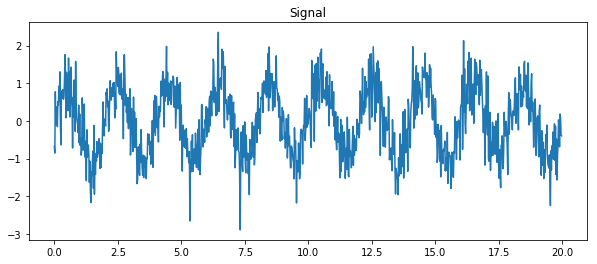

In [26]:
plt.figure(figsize=(10, 4))
plt.plot(time_vec, sig, label='Original signal')
plt.title('Signal')
plt.show()

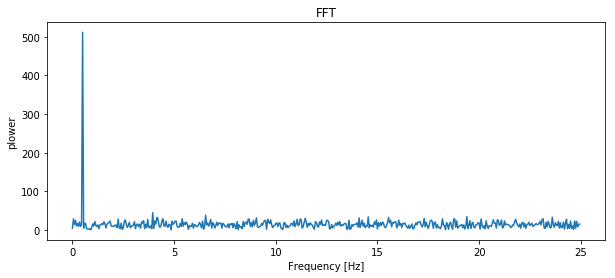

In [27]:
# The FFT of the signal
sig_fft = fftpack.fft(sig)

# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft)

# The corresponding frequencies
sample_freq = fftpack.fftfreq(sig.size, d=time_step)

# Plot the FFT power
plt.figure(figsize=(10, 4))
plt.plot(sample_freq[:500], power[:500])
plt.xlabel('Frequency [Hz]')
plt.ylabel('plower')
plt.title('FFT')
plt.show()

The peak signal frequency can be found with ``sample_freq[power.argmax()]``

In [28]:
peak_freq = sample_freq[power.argmax()]
peak_freq

0.5

Setting the Fourier component above this frequency to zero and inverting the FFT with `scipy.fftpack.ifft`, gives a filtered signal:

/opt/miniconda-latest/envs/neuro/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


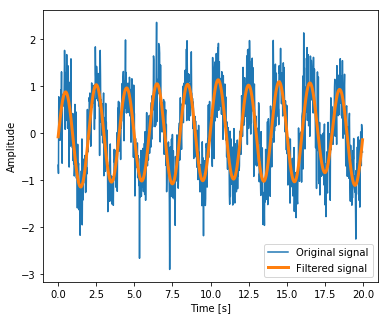

In [29]:
high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) > peak_freq] = 0
filtered_sig = fftpack.ifft(high_freq_fft)

plt.figure(figsize=(6, 5))
plt.plot(time_vec, sig, label='Original signal')
plt.plot(time_vec, filtered_sig, linewidth=3, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend(loc='best')
plt.show();

## Signal processing: `scipy.signal`

`scipy.signal` is for typical signal processing: 1D, regularly-sampled signals.

### Detrending `scipy.signal.detrend` - remove linear trend from signal:

In [30]:
# Generate a random signal with a trend
import numpy as np
t = np.linspace(0, 5, 100)
x = t + np.random.normal(size=100)

In [31]:
# Detrend
from scipy import signal
x_detrended = signal.detrend(x)

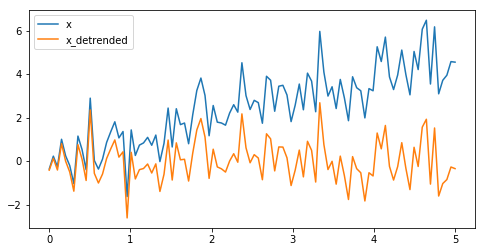

In [32]:
# Plot
from matplotlib import pyplot as plt
plt.figure(figsize=(8, 4))
plt.plot(t, x, label="x")
plt.plot(t, x_detrended, label="x_detrended")
plt.legend(loc='best')
plt.show()